In [1]:
import pandas as pd 
import patsy
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from feature_model import FeatureModel
import contextlib

In [2]:
from ce1_compare import compare, set_name, write_submission_txt, set_idm

In [3]:
set_name("Sujit", "Debnath")
set_idm("ve75wiwa")

# CE1 (Inherently explainable models part 1)
    - 1.1 Taking a look at the data: The bike dataset
        - 1.1.1 Fitting a RandomForestRegressor but something seems off..
            - Can you explain please?
        - 1.1.2 Finding the mistake through correlations
    - 1.2 Linear Modeling
        - 1.2.1 The intercept feature
        - 1.2.2 Re-scaling and shifting numerical features: Standardization
        - 1.2.3 Categorical encodings
        
    - Exercises/Homework:
        - 1.1 Standardising data
        - 1.2 LASSO-Regularisation
        - 1.3 Effect plot
        - 1.4 Feature engineering: Adding feature interaction 
        - 1.5 Feature engineering: Custom basis functions 


### 1.1.0 The bike dataset

In [4]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")

In [5]:
bike_data.df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,days_since_01_01_2011
0,1,0,1,0,6,0,2,8.175849,0.805833,0.160446,331,654,985,0
1,1,0,1,0,0,0,2,9.083466,0.696087,0.248539,131,670,801,1
2,1,0,1,0,1,1,1,1.229108,0.437273,0.248309,120,1229,1349,2
3,1,0,1,0,2,1,1,1.400000,0.590435,0.160296,108,1454,1562,3
4,1,0,1,0,3,1,1,2.666979,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,3.945849,0.652917,0.350133,247,1867,2114,726
727,1,1,12,0,5,1,2,3.906651,0.590000,0.155471,644,2451,3095,727
728,1,1,12,0,6,0,2,3.906651,0.752917,0.124383,159,1182,1341,728
729,1,1,12,0,0,0,1,4.024151,0.483333,0.350754,364,1432,1796,729


#### Let's check out the `datasets/bike/readme.txt` to find out what all these columns represent

In [6]:
bike_data.add_target("cnt")

FeatureModel(->Not fully specified yet!)


In [7]:
bike_data.add_all_features_but_target()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 )


In [8]:
X, y = bike_data.return_Xy()

In [9]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,days_since_01_01_2011
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,0.805833,0.160446,331.0,654.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,0.696087,0.248539,131.0,670.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,0.437273,0.248309,120.0,1229.0,2.0
3,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,0.590435,0.160296,108.0,1454.0,3.0
4,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,0.436957,0.186900,82.0,1518.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,0.652917,0.350133,247.0,1867.0,726.0
727,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.590000,0.155471,644.0,2451.0,727.0
728,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,0.752917,0.124383,159.0,1182.0,728.0
729,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,0.483333,0.350754,364.0,1432.0,729.0


In [10]:
bike_data.intercept=False

X, y = bike_data.return_Xy()

In [11]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,days_since_01_01_2011
0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,0.805833,0.160446,331.0,654.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,0.696087,0.248539,131.0,670.0,1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,0.437273,0.248309,120.0,1229.0,2.0
3,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,0.590435,0.160296,108.0,1454.0,3.0
4,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,0.436957,0.186900,82.0,1518.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,0.652917,0.350133,247.0,1867.0,726.0
727,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.590000,0.155471,644.0,2451.0,727.0
728,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,0.752917,0.124383,159.0,1182.0,728.0
729,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,0.483333,0.350754,364.0,1432.0,729.0


### 1.1.1 Fitting a Random Forest Regressor

In [12]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()

clf.fit(X, y.to_numpy().flatten())

RandomForestRegressor()

In [13]:
clf.score(X, y)

0.9995294453229031

#### Q: What is that score? You may want to check the documentation

### 1.1.2 Looking for correlations in the data

In [14]:
bike_data.add_feature("cnt")
X, _ = bike_data.return_Xy()

FeatureModel(cnt ~ -1 + season + yr + mnth + holiday + weekday + workingday + weathersit + temp + hum + windspeed + casual + registered + days_since_01_01_2011 + cnt )


In [15]:
sns.set(font_scale = 2)

def correlation_heatmap(X, size=5):
    fig, ax = plt.subplots(figsize=((size+1)*2,size*2))    
    sns.heatmap(np.corrcoef(X.transpose()), cmap="coolwarm", linewidth=0.5, xticklabels=X.columns, yticklabels=X.columns, ax=ax, vmin=-1, vmax=1)

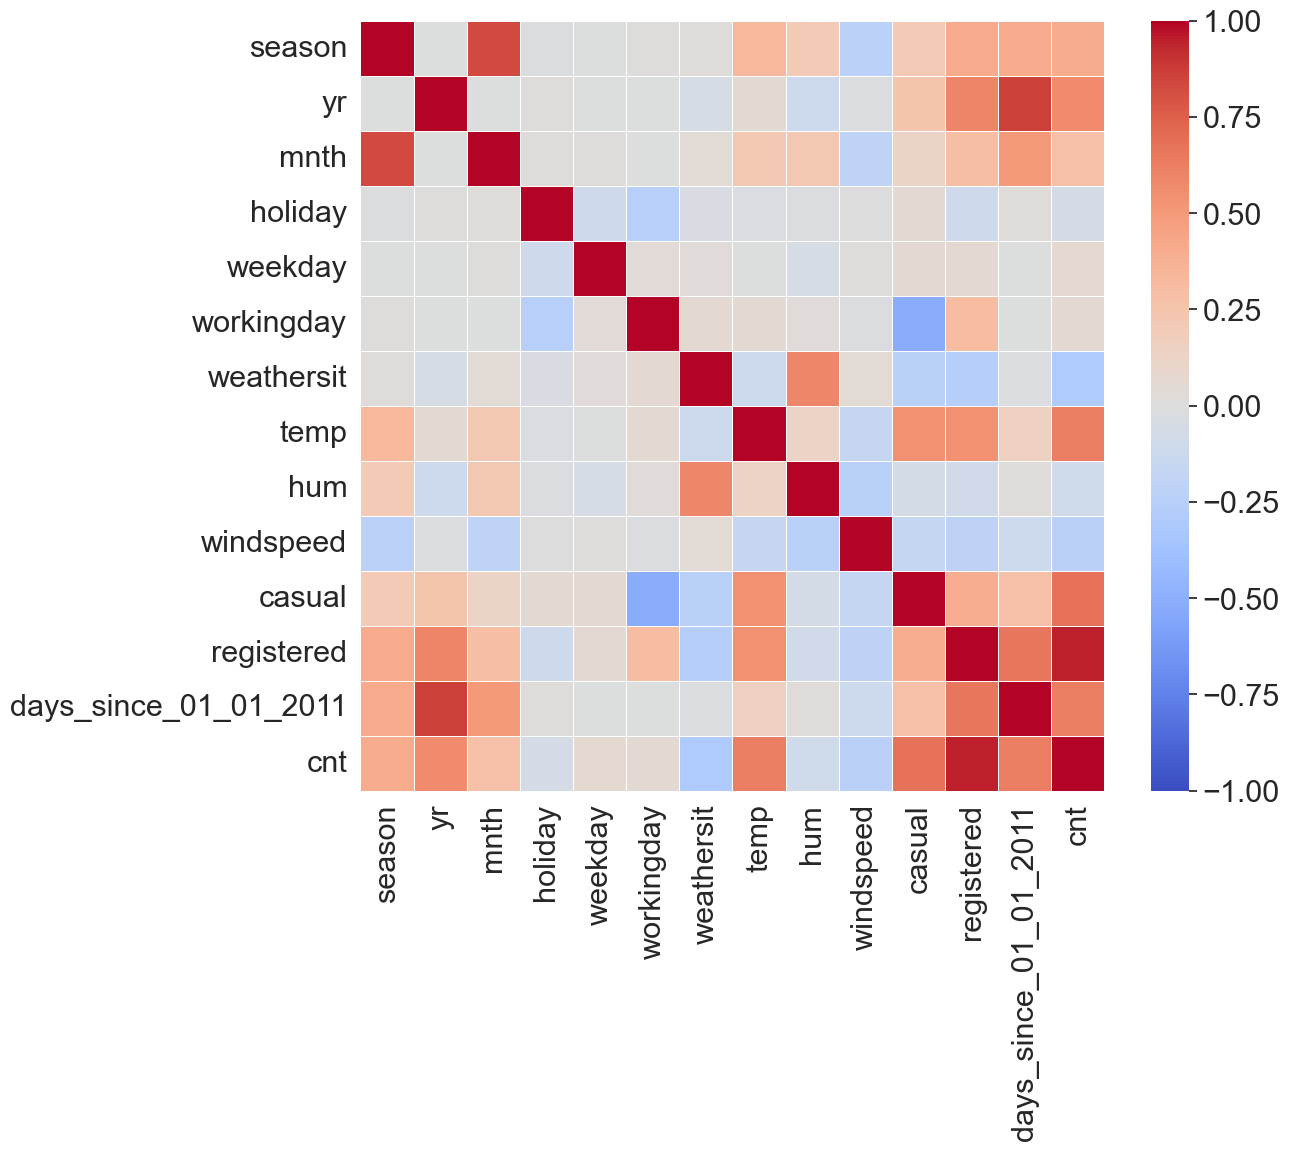

In [16]:
correlation_heatmap(X)

### 1.2.1 The intercept term
Without intercept term a e.g. linear model can not compensate for a target with a shifted mean value / mean value different to zero

In [17]:
bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv", include_intercept_feature=True)
bike_data.add_target("cnt")
bike_data.add_feature("temp")
bike_data.add_feature("days_since_01_01_2011")
bike_data.add_feature("workingday")
X, y = bike_data.return_Xy()

FeatureModel(->Not fully specified yet!)
FeatureModel(cnt ~ 1 + temp )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday )


In [18]:
y.mean()

cnt    4504.348837
dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression(fit_intercept=False)
regr.fit(X, y)

LinearRegression(fit_intercept=False)

In [20]:
regr.coef_

array([[703.178685  , 122.32509658,   5.01974321, 145.40909362]])

In [21]:
X.columns

Index(['Intercept', 'temp', 'days_since_01_01_2011', 'workingday'], dtype='object')

In [22]:
X, y = bike_data.return_Xy()
regr.fit(X, y)
print(regr.coef_)

[[703.178685   122.32509658   5.01974321 145.40909362]]


### 1.2.2 Rescaling and shifting numerical features

In [23]:
def center_temp(df):
    df.temp = df.temp - df.temp.mean()
    return df 
    
X, y = bike_data.return_Xy(transform_before=center_temp)

In [24]:
regr.fit(X, y)
print(regr.coef_)

[[2572.68354097  122.32509658    5.01974321  145.40909362]]


Notice how only the intercept term changed

Q: 
- What does this intercept value now mean / reflect? 
- What did the intercept value before centering the temperature feature?

Q: 
- What does the temperature weight mean? 
- When interpreting the weight what are you assuming? 
- Is your assumption justified, how could you check (at least an important part that underlies the assumption)? Hint: Correlations

In [25]:
def standardize_temp(df):
    df.temp = (df.temp - df.temp.mean())/df.temp.std()
    return df 
    
X, y = bike_data.return_Xy(transform_before=standardize_temp)

In [26]:
regr.fit(X, y)
print(regr.coef_)

[[2572.68354097 1052.41134657    5.01974321  145.40909362]]


Q: What is the ratio between the temperature weight before and after standardize?

Q: After standardising numerical features. Is it easier to interpret the weights individually? Is it easier to compare the magnitude of weights to other weigths?

Q: How to obtain a probabilistic estimate of weights?

In [27]:
import statsmodels.api as sm

In [28]:
sm_model = sm.OLS(y, X)

In [29]:
results = sm_model.fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     532.2
Date:                Wed, 10 May 2023   Prob (F-statistic):          6.71e-183
Time:                        22:23:43   Log-Likelihood:                -6145.0
No. Observations:                 731   AIC:                         1.230e+04
Df Residuals:                     727   BIC:                         1.232e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              2572.6835    100.777     25.528      0.000    2374.835    2770.532
temp                   1052.4113     40.712     25.850      0.000     972.485    1132.338
days_since_01_01_2011     5.0197      0.193     26.073      0.000       4.642       5.398
workingday              145.4091     86.511      1.681      0.093     -24.432     315.250
==============================================================================
Omnibus:                      115.305   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.326
Skew:                          -0.887   Prob(JB):                     1.45e-53
Kurtosis:                       5.200   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2.3 Encoding categorical features

In [31]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [32]:
def winter(season):
    return (season==1).astype(int)

def spring(season):
    return (season==2).astype(int)

def summer(season):
    return (season==3).astype(int)

In [33]:
bike_data.add_function_feature(winter, "season")
bike_data.add_function_feature(spring, "season")
bike_data.add_function_feature(summer, "season")

FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) )
FeatureModel(cnt ~ 1 + temp + days_since_01_01_2011 + workingday + winter(season) + spring(season) + summer(season) )


In [34]:
X, y = bike_data.return_Xy()

In [35]:
X

,Intercept,temp,days_since_01_01_2011,workingday,winter(season),spring(season),summer(season)
0,1.0,8.175849,0.0,0.0,1.0,0.0,0.0
1,1.0,9.083466,1.0,0.0,1.0,0.0,0.0
2,1.0,1.229108,2.0,1.0,1.0,0.0,0.0
3,1.0,1.400000,3.0,1.0,1.0,0.0,0.0
4,1.0,2.666979,4.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
726,1.0,3.945849,726.0,1.0,1.0,0.0,0.0
727,1.0,3.906651,727.0,1.0,1.0,0.0,0.0
728,1.0,3.906651,728.0,0.0,1.0,0.0,0.0
729,1.0,4.024151,729.0,0.0,1.0,0.0,0.0


Q: Why do you not need a fourth category for season=fall? Hint: Think about what the intercept term now means / for what category it stands for

C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sujit\miniconda3\envs\xML\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


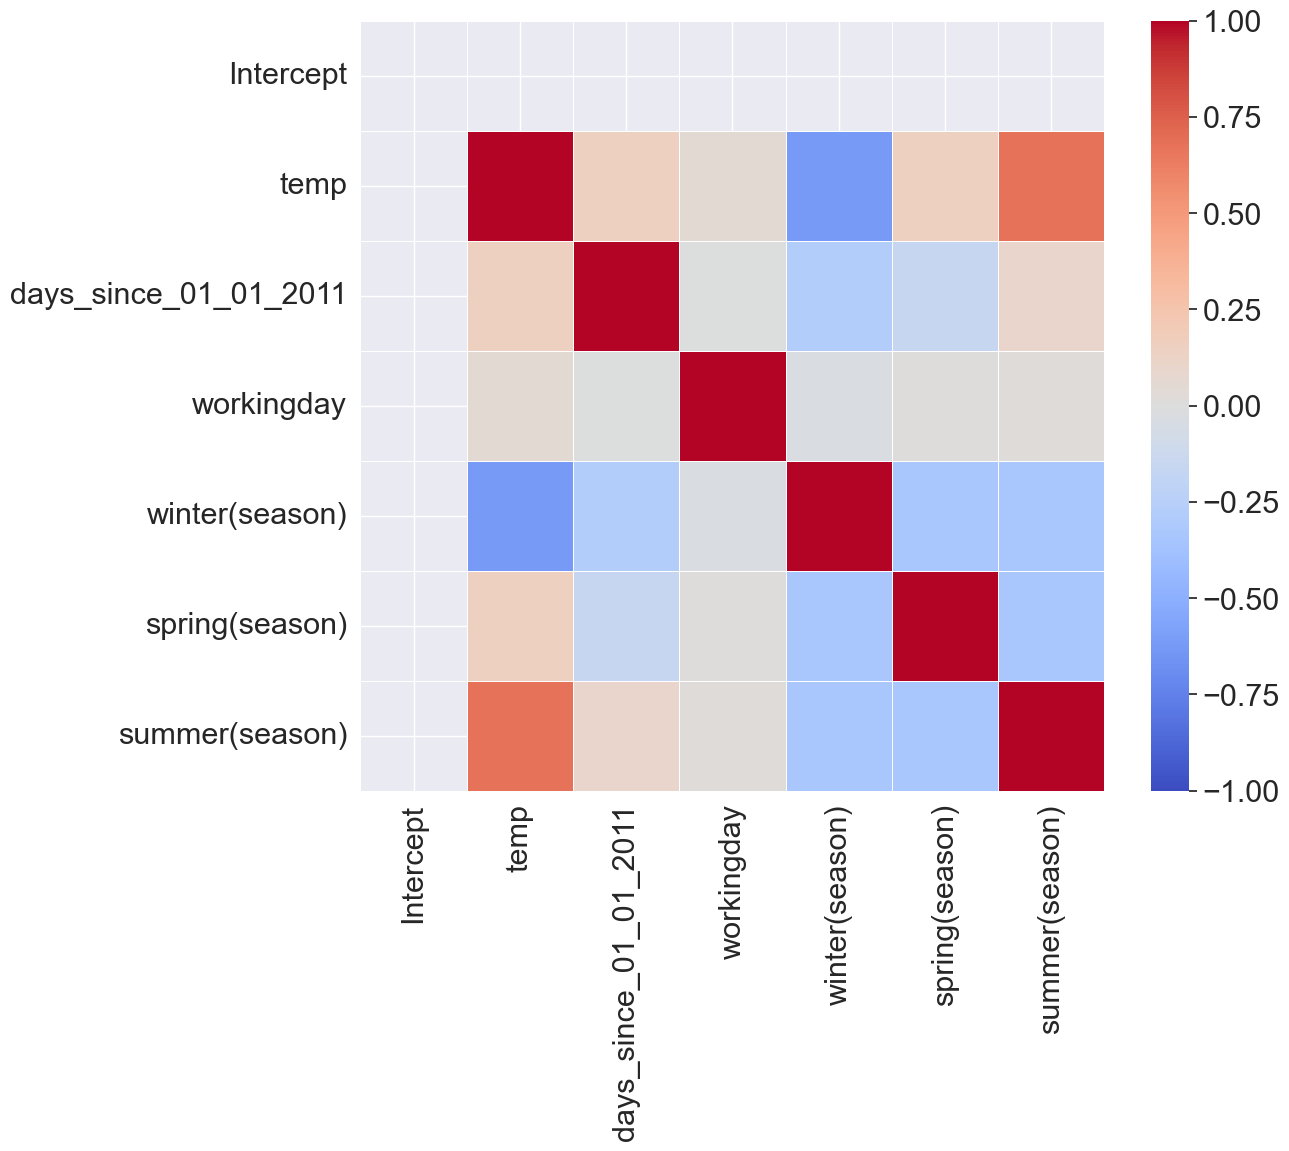

In [36]:
correlation_heatmap(X)

In [37]:
from sklearn.linear_model import Lasso

In [38]:
clf = Lasso(random_state=1, fit_intercept=False, alpha=1.0)

In [39]:
clf.fit(X, y)

Lasso(fit_intercept=False, random_state=1)

In [40]:
X.columns

Index(['Intercept', 'temp', 'days_since_01_01_2011', 'workingday',
       'winter(season)', 'spring(season)', 'summer(season)'],
      dtype='object')

In [41]:
clf.coef_

array([ 743.12515208,  113.83566909,    5.14109055,  140.43382115,
       -255.75223162,  564.62236554, -120.06061631])

Q: Look at the coefficient of the `is_summer` feature, can you interpret it as: **compared to `is_fall` people tend to rent 120 bikes less**? Why is that problematic? Hint: What is high in the summer?

# Homework

## 1.1 
Create a function that receives a boolean `standardize` and returns a tuple `X,y` where
- y: is the number of rented bikes for a day
- X: is the temperature of that day, the windspeed, the days since 01.01.2011, and the humidity. Finally, there should also be an intercept term. Make sure to add them in this order.
- If `standardize` is `True`, then the temperature, windspeed, days since 01.01.2011 and the humidity should be standardized (but not the intercept or the target variable)

In [149]:
bike_data.df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'days_since_01_01_2011'],
      dtype='object')

In [150]:
def ex_1_1(standardize: bool) -> tuple[np.array, np.array]:
    
    with contextlib.redirect_stdout(None):
        # in here nothing gets printed
        bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
        
        # TODO
        bike_data.add_target("cnt")
        bike_data.intercept = True
        
        feature_cols = ["temp", "windspeed", "days_since_01_01_2011", "hum"]
        for col in feature_cols:
            bike_data.add_feature(col)
        
    def standardize_fun(df):
        from sklearn.preprocessing import StandardScaler
        
        #TODO
        scaler = StandardScaler()
        df[feature_cols] = scaler.fit_transform(df[feature_cols])
        return df
    
    return bike_data.return_Xy(transform_before=standardize_fun if standardize else None)

In [152]:
# ex_1_1(True)
compare("ex_1_1", ex_1_1)

Great work!


## 1.2
Create a function that excepts the L1-regularisation parameter `alpha` and a boolean `standardize` and fits a `Lasso`-Regressor with `random_state`=1 and `fit_intercept`=False on the, depending on the input, **standardized** dataset of `ex_1_1`. It should return the number of rescale-R2-score where the number of features is equal to the number of non-zero weights. You can find the required formula on page 40 of the interpretable ML book (https://christophm.github.io/interpretable-ml-book/interpretable-ml.pdf).

You may re-use the function `ex_1_1` inside `ex_1_2`.

Bonus (technical programming stuff): Why might it be beneficial to import `Lasso` **inside** the function, and also define everything you need **inside** that function? 

In [157]:
def ex_1_2(alpha: float, standardize: bool) -> (float, np.array):
    
    import numpy as np 
    from sklearn.linear_model import Lasso
    from sklearn.metrics import r2_score
    
    X, y = ex_1_1(standardize)
    
    def scaled_r2_score(ytrue, ypred, p, n):
        #TODO
        r2 = r2_score(ytrue, ypred) # calculate the R^2 score
        return 1 - (1-r2) * ((n-1)/(n-p-1)) # calculate adjusted R^2 score
    
    #TODO
    lasso = Lasso(alpha=alpha, random_state=1, fit_intercept=False)
    lasso.fit(X, y)
    
    ypred = lasso.predict(X) # calculate the y_predicted
    p = np.sum(lasso.coef_ != 0) # p = number of features or number of non-zero weights
    n = len(y) # number of datapoints
    coef = lasso.coef_

    return scaled_r2_score(y, ypred, p, n), coef

In [159]:
# ex_1_2(0.6, True)
compare("ex_1_2", ex_1_2)

Great work!


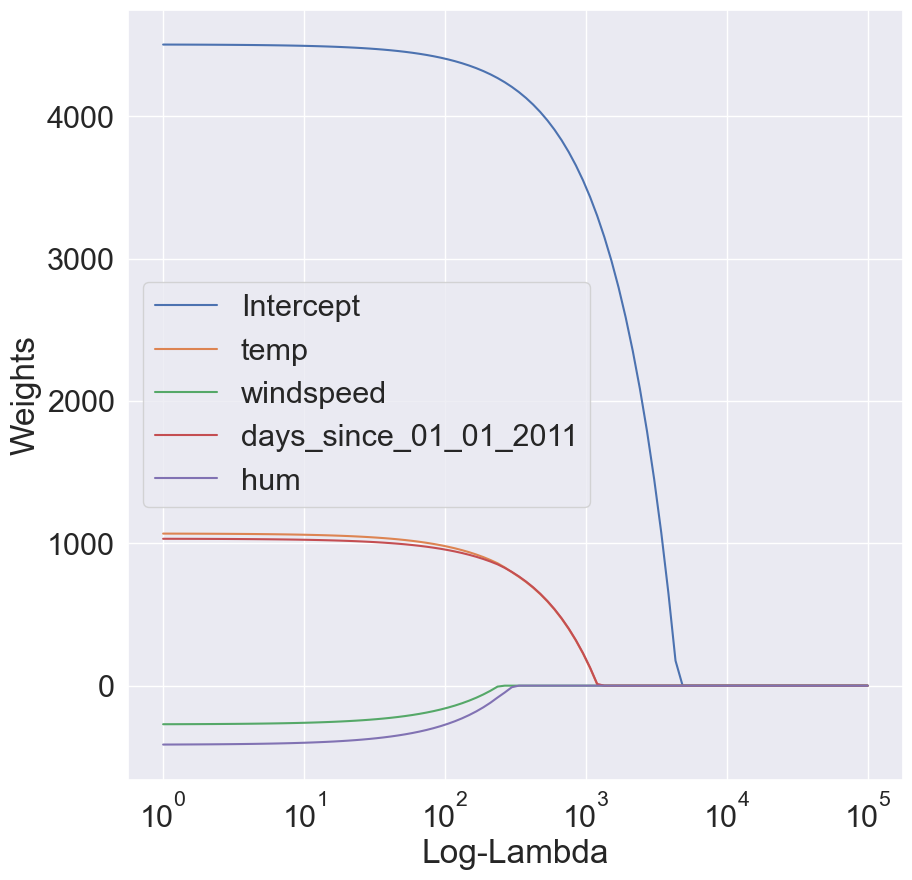

In [160]:
def create_lasso_regularisation_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    X, y = ex_1_1(True)
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xscale('log')

    for i,feature_name in enumerate(X.columns):
        plt.plot(alphas, [ex_1_2_out[a][1][i] for a in range(len(alphas))], label=feature_name)

    plt.legend()
    plt.xlabel("Log-Lambda")
    plt.ylabel("Weights")
    return 

#TODO: uncomment this
create_lasso_regularisation_plot(ex_1_2)

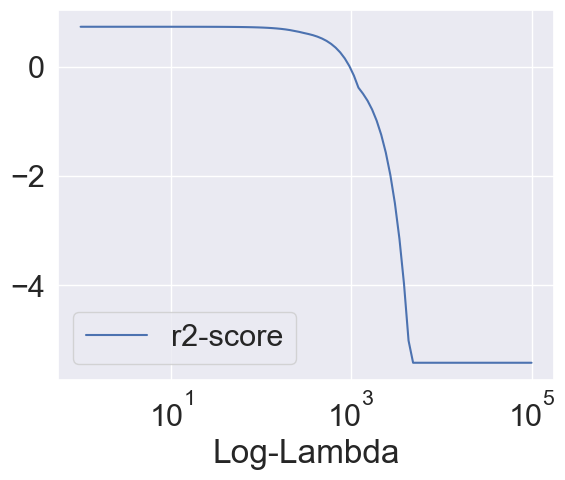

In [161]:
def create_r2_score_plot(ex_1_2):
    alphas = np.logspace(0, 5, 100)
    
    ex_1_2_out = list(map(lambda a: list(ex_1_2(a, True)), alphas))
    plt.plot(alphas, [ex_1_2_out[a][0] for a in range(len(alphas))], label="r2-score")
    ax = plt.gca()
    ax.set_xscale('log')
    plt.legend()
    plt.xlabel("Log-Lambda")
    
#TODO: uncomment this
create_r2_score_plot(ex_1_2)

Q: What does the r2-score tell you if it passes the x-axis, i.e. if it becomes lower than zero?

## 1.3 

Use the function `naive_effect_plot` to generate an effect plot of the Lasso-Algorithm with `alpha`=1.0 and `random_state`=1 and trained on the **not standardized** dataset from exercise `1_1`.
Where in this effect plot would the datapoint with the lowest rented bikes and the highest rented bikes lie? What is the feature in which these two datapoins differ the most? 
Write a function that returns the effect difference between these two data points for this feature.

In [163]:
import copy
def naive_effect_plot(X, y, coef):
    """
    Make sure that X is *not* standardized. This would defeat the purpose of an effect plot!
    """
    
    Xmean = X.mean(axis=0)
    Xstd = X.std(axis=0)
    vary_features = {}
    
    steps=3
    for col in X.columns:
        X_grid = []
        for a in np.linspace(-1,1,steps):
            Xtemp = copy.copy(Xmean)
            Xtemp[:] = 0
            Xtemp[col] = Xmean[col]+a*Xstd[col]
            X_grid.append(Xtemp)
        # prediction + intercept
        y_grid = np.dot(np.array(X_grid), coef)
        vary_features.update({col: y_grid})
    
    pd.DataFrame(vary_features).boxplot(vert=False)
    plt.xlabel(y.columns[0])
    plt.ylabel("features")
    plt.show()


In [164]:
#TODO: uncomment this
#X, y = ex_1_1(False)
#_, coef = ex_1_2(1.0, False)

#naive_effect_plot(X, y, coef)

In [165]:
def ex_1_3() -> float:
    X, y = ex_1_1(False)
    _, coef = ex_1_2(1.0, False)
    
    #TODO
    Xmin = X.loc[0]
    Xmax = X.loc[0]
    
    #TODO
    return 2.0

In [166]:
compare("ex_1_3", ex_1_3)

The provided function `<function ex_1_3 at 0x000001E835AA60D0>` does either not take the required inputs OR does not produce the right outputs OR your environment does not have all files/packages in order..


In [167]:
#TODO: uncomment this
#ex_1_3()

Q: What did you think was going on that day? How could you check? What other features are there that we haven't used?

## 1.4

Maybe people care less about temperature if they have to get to work and rent a bike regardless. How can we check that? -> By adding an interaction feature between `temp` and `workingday`

First, make a new dataset `cnt ~ 1 + temp + workingday + interaction(temp, workingday)`. No standardisation of the temperature feature!

Your interaction function should have the effect that your linear model can fit two different weights/slopes for the temperature feature depending on whether or not the day was a workingday.

Then write a function that fits a simple Linear Regression model (not LASSO!) on the dataset and outputs a tuple of floats where the first is the increase of number of rented bikes per degree if workingday, and the second float is the increase of number of rented bikes per degree if not a working day

In [168]:
def ex_1_4() -> tuple[float, float]:
    
    # TODO
    def interaction(temp, workingday):
        pass
    
    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
    # TODO
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=False)
    model.fit(X,y)
    coef = model.coef_[0]
    w_temp = coef[1]
    w_temp_and_workingday = coef[3]
    # TODO
    return 100, 100

In [169]:
compare("ex_1_4", ex_1_4)

Your function does interface but there is some mistake here in your function(/logic) .. 


In [170]:
w_of_temp_if_is_workingday, w_of_temp_if_isnt_workingday = ex_1_4()

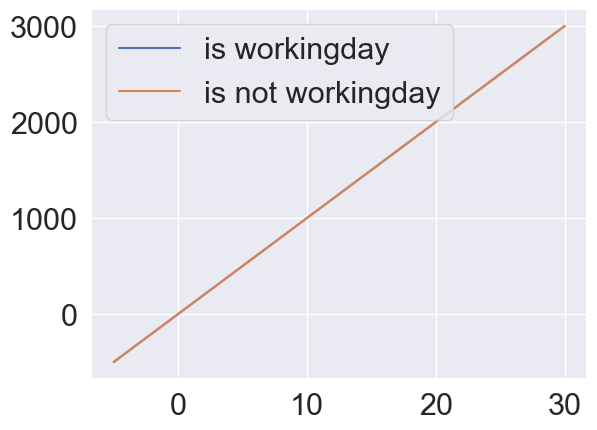

In [171]:
temps = np.linspace(-5, 30, 100)
plt.plot(temps, w_of_temp_if_is_workingday*temps, label="is workingday")
plt.plot(temps, w_of_temp_if_isnt_workingday*temps, label="is not workingday")
plt.legend()
plt.show()

## 1.5
Up to this point we have only considered modeling a linear dependence for the target variable of the temperature feature. It seems more natural that this effect saturates at higher temperatures (people find it too warm to ride a bike). Let's try to capture this by expanding up our one temperature feature into many different features using smooth basis functions. This class of model is called a linear additive model.

Write a function that as input takes the scale parameter `s` and a list of floats called `centers` and then it first creates the following dataset `cnt ~ 1 + temp  + gaussian(temp,centers[0],s) + gaussian(temp,centers[1],s) + ... + gaussian(temp,centers[-1],s)` where the function `gaussian` is given by 
$$g(t, c, s) = \exp({-\frac{(t-c)^2}{s^2}})$$
and where the center and scale parameter $s$ are given by the function input.

Then, the function should fit a Linear Regression and return the coefficients/weights.

In [172]:
def ex_1_5(centers: list[float], scale: float) -> np.ndarray:
    # we just make this function global so that we can re-use it out of scope (without passing it)
    global gaussian
    def gaussian(temp, center, scale=scale):
        #TODO
        pass

    bike_data = FeatureModel("datasets/bike/rented_bikes_day_pre.csv")
    #TODO
    
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(fit_intercept=False)
    #TODO


In [173]:
compare("ex_1_5", ex_1_5)

The provided function `<function ex_1_5 at 0x000001E836879040>` does either not take the required inputs OR does not produce the right outputs OR your environment does not have all files/packages in order..


In [174]:
def plot_temperature_dependence(coef, centers):
    temps = np.linspace(-5, 30, 100)
    gaussian_prediction = coef[:, 2:]@np.array(list(map(lambda center: gaussian(temps, center), centers)))
    linear_prediction = coef[:, 1]*temps
    intercept = coef[:, 0]
    plt.plot(temps, gaussian_prediction[0]+linear_prediction+intercept)
    plt.xlabel("Temperature [deg]")
    plt.ylabel("cnt")

In [175]:
#TODO
centers = []
scale=5
#TODO: uncomment this
#plot_temperature_dependence(ex_1_5(centers, scale), centers)

In [176]:
from ce1_compare import scores, grade
scores

{'ex_1_4': False}

In [177]:
#TODO: run this
write_submission_txt()

In [178]:
grade("ce1_Sujit_Debnath.txt")

Couldn't find your file..
